In [1]:
#Tensorflow library. Used to implement machine learning models
import tensorflow as tf
#Numpy contains helpful functions for efficient mathematical calculations
import numpy as np
#Dataframe manipulation library
import pandas as pd
#Graph plotting library
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\evellyn\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [16]:
#Loading in the movies dataset
movies = pd.read_csv(r'...\ml-1m\ml-1m\movies.dat', sep='::', header=None)
ratings = pd.read_csv(r'...\ml-1m\ml-1m\ratings.dat', sep='::', header=None)
movies.columns = ['movieId', 'title', 'genres']
ratings.columns = ['userId', 'movieId', 'rating', 'timestamp'] 


C:\Users\evellyn\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\evellyn\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [18]:
len(movies)

3883

In [19]:
movies['List Index'] = movies.index

In [20]:
data_combined = pd.merge(movies, ratings, on='movieId')
data_combined = data_combined.drop(['timestamp', 'title', 'genres'], 1)
data_combined.head(4)

,movieId,List Index,userId,rating
0,1,0,1,5
1,1,0,6,4
2,1,0,8,4
3,1,0,9,5


In [21]:
user_Group = data_combined.groupby('userId')
user_Group.first().head()

,movieId,List Index,rating
userId,,,
1,1,0,5
2,21,20,1
3,104,102,4
4,260,257,5
5,6,5,2


In [22]:
TotalUsers = 500
X = []
for userId, curUser in user_Group:
    temp = [0]*len(movies)
    for num, movie in curUser.iterrows():
        temp[movie['List Index']] = movie['rating']/5.0
    X.append(temp)
    if TotalUsers == 0:
        break
    TotalUseres -= 1

In [24]:
hidden_Units = 40
visible_Units = len(movies)
visible = tf.placeholder("float", [visible_Units])
hidden = tf.placeholder("float", [hidden_Units])
W = tf.placeholder("float", [visible_Units, hidden_Units])

In [28]:
v0 = tf.placeholder("float", [None, visible_Units])
_h0= tf.nn.sigmoid(tf.matmul(v0, W) + hidden)      
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))                    
                    
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + visible)
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hidden)

In [36]:
alpha=0.5
positive_phase = tf.matmul(tf.transpose(v0), h0)
negative_phase = tf.matmul(tf.transpose(v1), h1)
contrastive_divergence = positive_phase - negative_phase
contrastive_divergence = contrastive_divergence/tf.to_float(tf.shape(v0)[0])
update_w = W + alpha * contrastive_divergence
update_vb = visible + alpha * tf.reduce_mean(v0 - v1, 0) 
update_hb = hidden + alpha * tf.reduce_mean(h0 - h1, 0)

In [37]:
err = v0 - v1
err_sum = tf.reduce_mean(err * err)

In [38]:
#Current weight
cur_w = np.zeros([visible_Units, hidden_Units], np.float32)
#Current visible unit biases
cur_vb = np.zeros([visible_Units], np.float32)
#Current hidden unit biases
cur_hb = np.zeros([hidden_Units], np.float32)
#Previous weight
prv_w = np.zeros([visible_Units, hidden_Units], np.float32)
#Previous visible unit biases
prv_vb = np.zeros([visible_Units], np.float32)
#Previous hidden unit biases
prv_hb = np.zeros([hidden_Units], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

0.039995648
0.03823068
0.037356324
0.037077714
0.03688063
0.03663472
0.036498006
0.036424726
0.036379844
0.036199816
0.036206212
0.03610022
0.0360353
0.036107287
0.03609483
0.036690246
0.036533996
0.036297683
0.036237434
0.0361799


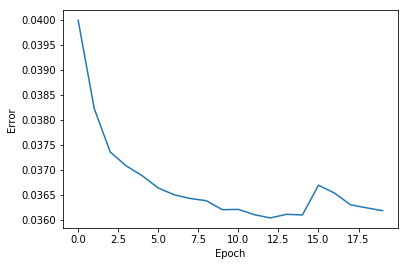

In [39]:
epochs = 20
batchsize = 20
errors = []
for i in range(epochs):
    for start, end in zip( range(0, len(X), batchsize), range(batchsize, len(X), batchsize)):
        batch = X[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, visible: prv_vb, hidden: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, visible: prv_vb, hidden: prv_hb})
        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, visible: prv_vb, hidden: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_nb
    errors.append(sess.run(err_sum, feed_dict={v0: X, W: cur_w, visible: cur_vb, hidden: cur_nb}))
    print(errors[-1])
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [47]:
inputUser = [X[75]]

In [48]:
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hidden)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + visible)
feed = sess.run(hh0, feed_dict={ v0: inputUser, W: prv_w, hidden: prv_hb})
rec = sess.run(vv1, feed_dict ={ hh0: feed, W: prv_w, visible: prv_vb})

In [49]:
scored_movies_30 = movies
scored_movies_30["Recomendação Score"] = rec[0]
scored_movies_30.sort_values(["Recomendação Score"], ascending=False).head(10)

,movieId,title,genres,List Index,Recomendação Score
2789,2858,American Beauty (1999),Comedy|Drama,2789,0.955090
604,608,Fargo (1996),Crime|Drama|Thriller,604,0.883577
3412,3481,High Fidelity (2000),Comedy,3412,0.866511
49,50,"Usual Suspects, The (1995)",Crime|Thriller,49,0.852624
2327,2396,Shakespeare in Love (1998),Comedy|Romance,2327,0.825277
589,593,"Silence of the Lambs, The (1991)",Drama|Thriller,589,0.796800
523,527,Schindler's List (1993),Drama|War,523,0.793376
315,318,"Shawshank Redemption, The (1994)",Drama,315,0.758650
3248,3317,Wonder Boys (2000),Comedy|Drama,3248,0.743627
3339,3408,Erin Brockovich (2000),Drama,3339,0.716330
